In [1]:
import numpy as np # 넘파이, 수치해석용 파이썬 패키지지
import io #웹정보를 제공하는 정해진 알고리즘으로 불러와 사용자에게 필요한 정보로 변환
import pandas as pd #  파이썬에서 표 형태의 데이터를 탐색하고 분석하는데 사용하는 라이브러리

import matplotlib as mpl # 파이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지
import matplotlib.pyplot as plt # MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음
import seaborn as sns # Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

import warnings # 워닝 메세지 안뜨게 하기 위해서

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #높은 해상도의 그래프 출력

mpl.rc('font', family = 'malgun_gothic') # 글자체 고딕
mpl.rc('axes', unicode_minus=False) # 유니코드 마이너스 오류 안뜨게

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore') # 에러 메세지 무시

In [3]:
# 지드라이브와 연결
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리
from sklearn.model_selection import train_test_split # 원본 데이터를 알아서 훈련 세트와 테스트 세트로 나눠줌줌
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# accuracy_score: 정답률( =정확도 )  (TP + TN) / (TP + TN + FP + FN) 진짜인걸 맞춘거 + 가짜인걸 맞춘거 / 전체
# precision_score: 정밀도  TP / (FP + TP) 진짜인걸 맞춘거 / 긍정적 예측을 실패한것(실제론 썩은밤) + 진짜인걸 맞춘거
# recall_score: 재현율 TP / (FN + TP) 진짜인걸 맞춘거 / 부정적인 예측을 실패한것(실제론 맛있는 밤) + 진짜인걸 맞춘거
# roc_auc_score:  167p 공룡, 이진 분류의 예측 성능 측정에 중요하게 사용되는 지표

from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
# f1_score: 정밀도 * 재현율 / 정밀도 + 재현율
# precision_recall_curve: Parameter인 Threshold를 변화시키면서 Precision과 Recall을 Plot 한 Curve입니다. 
## Precision-Recall Curves는 X축으로는 Recall을, Y축으로는 Precision을 가집니다.
## Precision-Recall Curve는 단조함수가 아닙니다. 이러한 이유로 ROC Curve보다 직관적이지 못하다는 단점을 가집니다.
# roc_curve: FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 변화를 나타내는 곡선

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

house_train = pd.read_csv('/content/gdrive/MyDrive/kaggle/train.csv')
house_test = pd.read_csv('/content/gdrive/MyDrive/kaggle/test.csv')
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
house_train_scatter_color = house_train.copy()

In [8]:
house_train_scatter_color['MSSubClass'] = house_train_scatter_color['MSSubClass'].astype(str)

In [9]:
house_train_scatter_color_numeric = house_train_scatter_color[house_train_scatter_color.dtypes[house_train_scatter_color.dtypes != object].index].drop('Id', axis = 1)

In [10]:
house_train_scatter_color_object = house_train_scatter_color[house_train_scatter_color.dtypes[house_train_scatter_color.dtypes == object].index]

In [11]:
house_train_scatter_color_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
outliers_c = ['LotFrontage', 'LotArea', 'MasVnrArea',
            'BsmtUnfSF', 'TotalBsmtSF', 'ScreenPorch',
            'MiscVal']

In [13]:
outliers = ['LotFrontage_outlier_index', 'LotArea_outlier_index', 'MasVnrArea_outlier_index',
            'BsmtUnfSF_outlier_index', 'TotalBsmtSF_outlier_index', 'ScreenPorch_outlier_index',
            'MiscVal_outlier_index']

In [14]:
LotFrontage_outlier_index =  [197, 231, 934, 1127, 1298]
LotArea_outlier_index = [249, 313, 335]
MasVnrArea_outlier_index = [58, 70, 115, 297, 691, 808, 1169]
BsmtUnfSF_outlier_index = [224]
TotalBsmtSF_outlier_index = [307, 490, 494, 574, 636, 703, 710, 740, 872, 1100, 1298]
ScreenPorch_outlier_index = [1328, 1386]
MiscVal_outlier_index = [346, 705, 1230, 1457]

In [15]:
house_train_scatter_color_numeric['LotFrontage'][197] 

174.0

In [16]:
house_train_scatter_color_numeric['LotFrontage'].median()

69.0

In [17]:
for i, j in zip(outliers_c, outliers):
    a = house_train_scatter_color_numeric[i].median()
    print(j)
    for k in eval(j):
        print(k)
        house_train_scatter_color_numeric[i][k] = a

LotFrontage_outlier_index
197
231
934
1127
1298
LotArea_outlier_index
249
313
335
MasVnrArea_outlier_index
58
70
115
297
691
808
1169
BsmtUnfSF_outlier_index
224
TotalBsmtSF_outlier_index
307
490
494
574
636
703
710
740
872
1100
1298
ScreenPorch_outlier_index
1328
1386
MiscVal_outlier_index
346
705
1230
1457


In [18]:
house_train_scatter_color_numeric[i].median()

0.0

In [19]:
house_train_scatter_color_numeric['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [20]:
house_train_scatter_color_numeric['LotFrontage'][197] 

69.0

In [21]:
################################################################################
########################### 변수명 수정 할 것
from scipy.stats import skew 
# 왜도(치우쳐진 정도)

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_train_scatter_color_numeric.dtypes[house_train_scatter_color_numeric.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_train_scatter_color_numeric[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolArea         14.813135
3SsnPorch        10.293752
LowQualFinSF      9.002080
MiscVal           8.967306
LotArea           6.187151
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
BsmtHalfBath      4.099186
ScreenPorch       3.955462
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [22]:
ske_features_top_index = skew_features_top

In [23]:
ske_features_top_index

LotArea           6.187151
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
1stFlrSF          1.375342
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       3.955462
PoolArea         14.813135
MiscVal           8.967306
SalePrice         1.880941
dtype: float64

In [24]:
house_train_scatter_color_numeric[skew_features_top.index] = np.log1p(house_train_scatter_color_numeric[skew_features_top.index])

In [25]:
################################################################################
########################### 변수명 수정 할 것
from scipy.stats import skew 
# 왜도(치우쳐진 정도)

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_train_scatter_color_numeric.dtypes[house_train_scatter_color_numeric.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_train_scatter_color_numeric[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.312458
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.179407
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64


In [26]:
house_train_scatter_color_numeric

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,9.042040,7,5,2003,2003,196.0,6.561031,0.000000,150,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,12.247699
1,80.0,9.169623,6,8,1976,1976,0.0,6.886532,0.000000,284,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,12.109016
2,68.0,9.328212,7,5,2001,2002,162.0,6.188264,0.000000,434,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,12.317171
3,60.0,9.164401,7,5,1915,1970,0.0,5.379897,0.000000,540,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,11.849405
4,84.0,9.565284,8,5,2000,2000,350.0,6.486161,0.000000,490,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.976894,6,5,1999,2000,0.0,0.000000,0.000000,953,...,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.0,8,2007,12.072547
1456,85.0,9.486152,6,6,1978,1988,119.0,6.673298,5.099866,589,...,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.0,2,2010,12.254868
1457,66.0,9.109746,7,9,1941,2006,0.0,5.620401,0.000000,877,...,0.000000,4.110874,0.000000,0.0,0.0,0.0,0.0,5,2010,12.493133
1458,68.0,9.181735,5,6,1950,1996,0.0,3.912023,6.937314,0,...,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.0,4,2010,11.864469


In [27]:
house_train_scatter_color_numeric.isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [28]:
# LotFrontage 중앙값으로 널값 채우기기
house_train_scatter_color_numeric.loc[:, "LotFrontage"] = house_train_scatter_color_numeric.loc[:, "LotFrontage"].fillna(house_train_scatter_color_numeric['LotFrontage'].median())
house_train_scatter_color_numeric.loc[:, "GarageYrBlt"] = house_train_scatter_color_numeric.loc[:, "GarageYrBlt"].fillna(house_train_scatter_color_numeric['GarageYrBlt'].median())
house_train_scatter_color_numeric.loc[:, "MasVnrArea"] = house_train_scatter_color_numeric.loc[:, "MasVnrArea"].fillna(house_train_scatter_color_numeric['MasVnrArea'].median())

In [29]:
house_train_scatter_color_numeric.isna().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [30]:
house_train_scatter_color_object

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
house_train_scatter_color_object.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
house_train_scatter_color_object.loc[:, "Alley"] = house_train_scatter_color_object.loc[:, "Alley"].fillna(0)

In [33]:
house_train_scatter_color_object.loc[:, "BsmtQual"] = house_train_scatter_color_object.loc[:, "BsmtQual"].fillna("No")
house_train_scatter_color_object.loc[:, "BsmtCond"] = house_train_scatter_color_object.loc[:, "BsmtCond"].fillna("No")
house_train_scatter_color_object.loc[:, "BsmtExposure"] = house_train_scatter_color_object.loc[:, "BsmtExposure"].fillna("No")
house_train_scatter_color_object.loc[:, "BsmtFinType1"] = house_train_scatter_color_object.loc[:, "BsmtFinType1"].fillna("No")
house_train_scatter_color_object.loc[:, "BsmtFinType2"] = house_train_scatter_color_object.loc[:, "BsmtFinType2"].fillna("No")
house_train_scatter_color_object.loc[:, "FireplaceQu"] = house_train_scatter_color_object.loc[:, "FireplaceQu"].fillna("No")
house_train_scatter_color_object.loc[:, "GarageType"] = house_train_scatter_color_object.loc[:, "GarageType"].fillna("No")
house_train_scatter_color_object.loc[:, "GarageFinish"] = house_train_scatter_color_object.loc[:, "GarageFinish"].fillna("No")
house_train_scatter_color_object.loc[:, "GarageQual"] = house_train_scatter_color_object.loc[:, "GarageQual"].fillna("No")
house_train_scatter_color_object.loc[:, "GarageCond"] = house_train_scatter_color_object.loc[:, "GarageCond"].fillna("No")
house_train_scatter_color_object.loc[:, "PoolQC"] = house_train_scatter_color_object.loc[:, "PoolQC"].fillna("No")
house_train_scatter_color_object.loc[:, "Fence"] = house_train_scatter_color_object.loc[:, "Fence"].fillna("No")
house_train_scatter_color_object.loc[:, "MiscFeature"] = house_train_scatter_color_object.loc[:, "MiscFeature"].fillna("No")
house_train_scatter_color_object.loc[:, "MasVnrType"] = house_train_scatter_color_object.loc[:, "MasVnrType"].fillna("None")

In [34]:
    house_train_scatter_color_object = house_train_scatter_color_object.replace({'Street' :{'Grvl':1,'Pave':2},
                      "Alley" : {"Grvl" : 1, "Pave" : 2},
                      'LandContour' : {'Bnk' : 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       'SaleCondition' : {'AdjLand' : 1, 'Abnorml' : 2, 'Family' : 3, 'Alloca' : 4, 'Normal' : 5, 'Partial' : 6},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       'CentralAir' : {'N' : 0, 'Y' : 1},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [35]:
house_train_scatter_color_object.isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [36]:
house_train_scatter_color_object['BsmtQual'] = house_train_scatter_color_object['BsmtQual'].astype(int)
house_train_scatter_color_object['BsmtCond'] = house_train_scatter_color_object['BsmtCond'].astype(int)
house_train_scatter_color_object['BsmtExposure'] = house_train_scatter_color_object['BsmtExposure'].astype(int)
house_train_scatter_color_object['BsmtFinType1'] = house_train_scatter_color_object['BsmtFinType1'].astype(int)
house_train_scatter_color_object['BsmtFinType2'] = house_train_scatter_color_object['BsmtFinType2'].astype(int)
house_train_scatter_color_object['FireplaceQu'] = house_train_scatter_color_object['FireplaceQu'].astype(int)
house_train_scatter_color_object['GarageQual'] = house_train_scatter_color_object['GarageQual'].astype(int)
house_train_scatter_color_object['GarageCond'] = house_train_scatter_color_object['GarageCond'].astype(int)
house_train_scatter_color_object['PoolQC'] = house_train_scatter_color_object['PoolQC'].astype(int)

In [37]:
house_train_scatter_color_object.dtypes[house_train_scatter_color_object.dtypes == float].index

Index([], dtype='object')

In [38]:
house_train_scatter_color_numeric

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,9.042040,7,5,2003,2003,196.0,6.561031,0.000000,150,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,12.247699
1,80.0,9.169623,6,8,1976,1976,0.0,6.886532,0.000000,284,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,12.109016
2,68.0,9.328212,7,5,2001,2002,162.0,6.188264,0.000000,434,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,12.317171
3,60.0,9.164401,7,5,1915,1970,0.0,5.379897,0.000000,540,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,11.849405
4,84.0,9.565284,8,5,2000,2000,350.0,6.486161,0.000000,490,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.976894,6,5,1999,2000,0.0,0.000000,0.000000,953,...,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.0,8,2007,12.072547
1456,85.0,9.486152,6,6,1978,1988,119.0,6.673298,5.099866,589,...,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.0,2,2010,12.254868
1457,66.0,9.109746,7,9,1941,2006,0.0,5.620401,0.000000,877,...,0.000000,4.110874,0.000000,0.0,0.0,0.0,0.0,5,2010,12.493133
1458,68.0,9.181735,5,6,1950,1996,0.0,3.912023,6.937314,0,...,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.0,4,2010,11.864469


In [39]:
house_train_scatter_color_object

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,2,0,4,1,4,Inside,3,CollgCr,...,Attchd,RFn,3,3,2,0,No,No,WD,5
1,20,RL,2,0,4,1,4,FR2,3,Veenker,...,Attchd,RFn,3,3,2,0,No,No,WD,5
2,60,RL,2,0,3,1,4,Inside,3,CollgCr,...,Attchd,RFn,3,3,2,0,No,No,WD,5
3,70,RL,2,0,3,1,4,Corner,3,Crawfor,...,Detchd,Unf,3,3,2,0,No,No,WD,2
4,60,RL,2,0,3,1,4,FR2,3,NoRidge,...,Attchd,RFn,3,3,2,0,No,No,WD,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,2,0,4,1,4,Inside,3,Gilbert,...,Attchd,RFn,3,3,2,0,No,No,WD,5
1456,20,RL,2,0,4,1,4,Inside,3,NWAmes,...,Attchd,Unf,3,3,2,0,MnPrv,No,WD,5
1457,70,RL,2,0,4,1,4,Inside,3,Crawfor,...,Attchd,RFn,3,3,2,0,GdPrv,Shed,WD,5
1458,20,RL,2,0,4,1,4,Inside,3,NAmes,...,Attchd,Unf,3,3,2,0,No,No,WD,5


In [40]:
imsi12 = house_train_scatter_color_object.join(house_train_scatter_color_numeric)

In [41]:
imsi12.iloc[:,-1]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [42]:
imsi13 = imsi12.iloc[:,:-1]
imsi14 = imsi12.iloc[:,-1]

In [43]:
imsi13

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,RL,2,0,4,1,4,Inside,3,CollgCr,...,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008
1,20,RL,2,0,4,1,4,FR2,3,Veenker,...,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007
2,60,RL,2,0,3,1,4,Inside,3,CollgCr,...,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008
3,70,RL,2,0,3,1,4,Corner,3,Crawfor,...,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006
4,60,RL,2,0,3,1,4,FR2,3,NoRidge,...,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,2,0,4,1,4,Inside,3,Gilbert,...,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.0,8,2007
1456,20,RL,2,0,4,1,4,Inside,3,NWAmes,...,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.0,2,2010
1457,70,RL,2,0,4,1,4,Inside,3,Crawfor,...,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,0.0,5,2010
1458,20,RL,2,0,4,1,4,Inside,3,NAmes,...,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.0,4,2010


In [44]:
imsi15 = pd.get_dummies(imsi13)

In [45]:
imsi15

,Street,Alley,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,...,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,2,0,4,1,4,3,4,3,4,3,...,0,0,0,0,0,0,0,0,0,1
1,2,0,4,1,4,3,3,3,4,3,...,0,0,0,0,0,0,0,0,0,1
2,2,0,3,1,4,3,4,3,4,3,...,0,0,0,0,0,0,0,0,0,1
3,2,0,3,1,4,3,3,3,3,4,...,0,0,0,0,0,0,0,0,0,1
4,2,0,3,1,4,3,4,3,4,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,0,4,1,4,3,3,3,4,3,...,0,0,0,0,0,0,0,0,0,1
1456,2,0,4,1,4,3,3,3,4,3,...,0,0,0,0,0,0,0,0,0,1
1457,2,0,4,1,4,3,5,4,3,4,...,0,0,0,0,0,0,0,0,0,1
1458,2,0,4,1,4,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1


In [46]:
imsi16 = imsi15.join(imsi14)

In [47]:
imsi16

,Street,Alley,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,2,0,4,1,4,3,4,3,4,3,...,0,0,0,0,0,0,0,0,1,12.247699
1,2,0,4,1,4,3,3,3,4,3,...,0,0,0,0,0,0,0,0,1,12.109016
2,2,0,3,1,4,3,4,3,4,3,...,0,0,0,0,0,0,0,0,1,12.317171
3,2,0,3,1,4,3,3,3,3,4,...,0,0,0,0,0,0,0,0,1,11.849405
4,2,0,3,1,4,3,4,3,4,3,...,0,0,0,0,0,0,0,0,1,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,0,4,1,4,3,3,3,4,3,...,0,0,0,0,0,0,0,0,1,12.072547
1456,2,0,4,1,4,3,3,3,4,3,...,0,0,0,0,0,0,0,0,1,12.254868
1457,2,0,4,1,4,3,5,4,3,4,...,0,0,0,0,0,0,0,0,1,12.493133
1458,2,0,4,1,4,3,3,3,3,3,...,0,0,0,0,0,0,0,0,1,11.864469


In [48]:
imsi16.columns

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SalePrice'],
      dtype='object', length=235)

In [49]:
imsi16.corrwith(imsi16['SalePrice']).abs().sort_values()

MSSubClass_80       0.001134
MiscFeature_Gar2    0.001624
RoofMatl_ClyTile    0.002696
SaleType_ConLI      0.003058
LotConfig_Corner    0.003985
                      ...   
ExterQual           0.678840
GarageCars          0.680625
GrLivArea           0.730254
OverallQual         0.817185
SalePrice           1.000000
Length: 235, dtype: float64

In [50]:
imsi16_corr = list(imsi16.corrwith(imsi16['SalePrice']).abs().sort_values()[imsi16.corrwith(imsi16['SalePrice']).abs().sort_values() > 0.05].index)

In [51]:
imsi17 = imsi16[imsi16_corr]

In [52]:
imsi18 = imsi17.iloc[:,:-1]
imsi19 = imsi17.iloc[:,-1]

In [53]:
house_new_train = imsi18.copy()
house_new_target = imsi19.copy()

In [54]:
imsi18

,Condition1_PosA,RoofMatl_WdShake,Exterior2nd_Wd Shng,LowQualFinSF,Heating_Floor,Condition2_RRNn,MSSubClass_20,Condition2_Feedr,Exterior2nd_Brk Cmn,MoSold,...,FullBath,1stFlrSF,BsmtQual,TotalBsmtSF,GarageArea,KitchenQual,ExterQual,GarageCars,GrLivArea,OverallQual
0,0,0,0,0.0,0,0,0,0,0,2,...,2,6.753438,4,856,548,4,4,2,7.444833,7
1,0,0,0,0.0,0,0,1,0,0,5,...,2,7.141245,4,1262,460,3,3,2,7.141245,6
2,0,0,0,0.0,0,0,0,0,0,9,...,2,6.825460,4,920,608,4,4,2,7.488294,7
3,0,0,1,0.0,0,0,0,0,0,2,...,1,6.869014,3,756,642,4,3,3,7.448916,7
4,0,0,0,0.0,0,0,0,0,0,12,...,2,7.044033,4,1145,836,4,4,3,7.695758,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0.0,0,0,0,0,0,8,...,2,6.860664,4,953,460,3,3,2,7.407318,6
1456,0,0,0,0.0,0,0,1,0,0,2,...,2,7.637234,4,1542,500,3,3,2,7.637234,6
1457,0,0,0,0.0,0,0,0,0,0,5,...,2,7.080868,3,1152,252,4,5,1,7.758333,7
1458,0,0,0,0.0,0,0,1,0,0,4,...,1,6.983790,3,1078,240,4,3,1,6.983790,5


In [55]:
imsi19

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [56]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



X_features = house_new_train
y_target = house_new_target

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.137
Ridge 로그 변환된 RMSE: 0.133
Lasso 로그 변환된 RMSE: 0.195


[0.13748865871284816, 0.13294822958094726, 0.19504720983361762]

In [58]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient(계수=상관관계를 숫자로 치환한거고 음/양 다 있음) 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


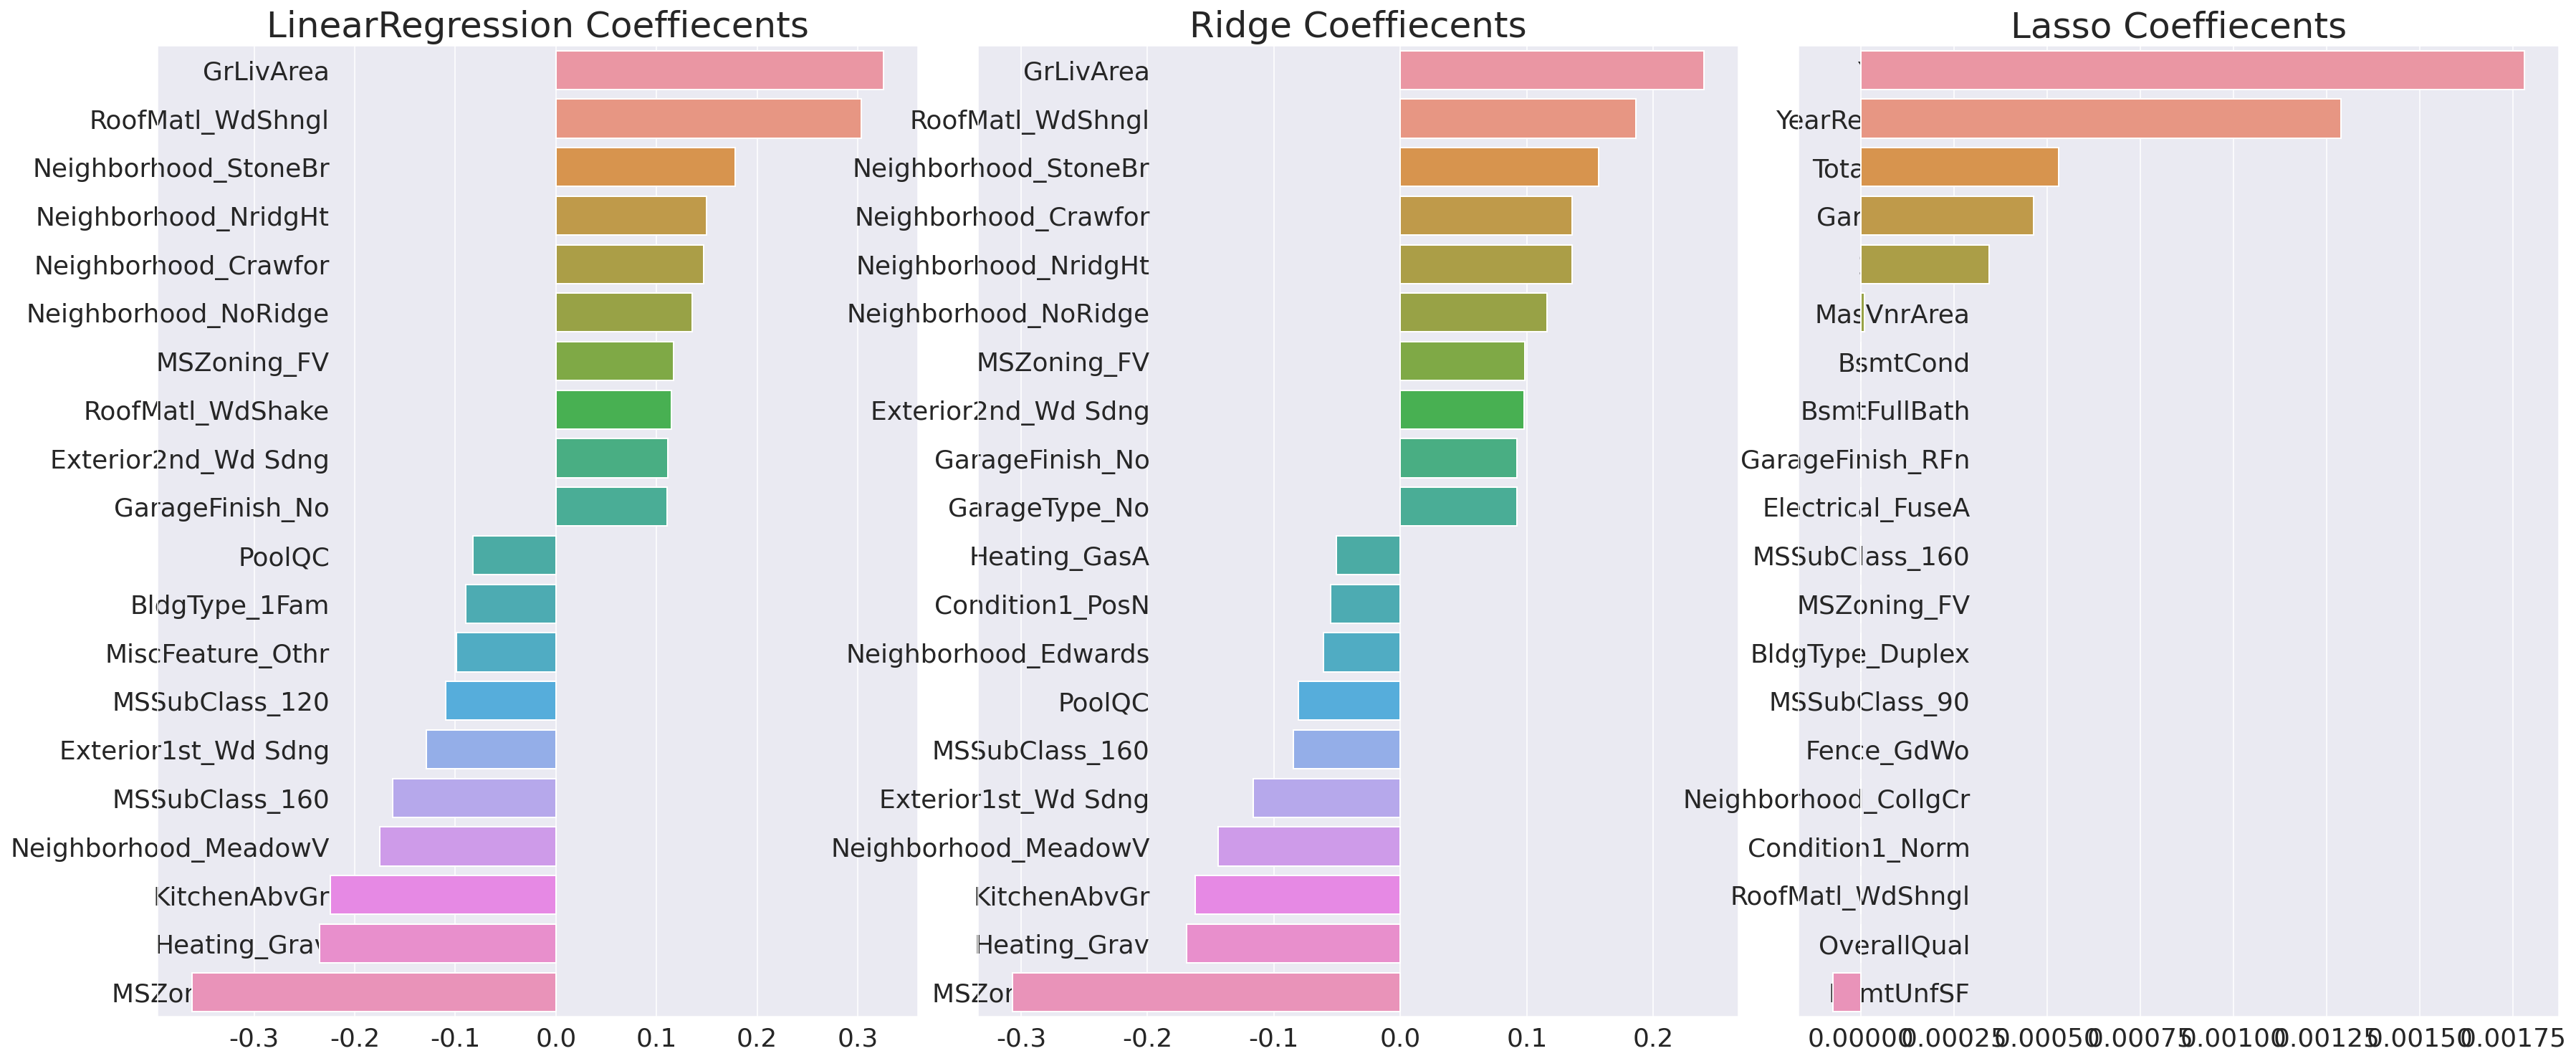

In [59]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat(하나의 데이터프레임으로 붙여줌)으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick(축axis) label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(18)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [60]:

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5)) # 교차검증 횟수를 5번 설정해줘서 값이 5개 나옴
        rmse_avg = np.mean(rmse_list) # 위에서 나온 값 5개의 평균
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))  # 소숫점 셋째자리에서 반올림
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.118 0.149 0.135 0.124 0.151]
LinearRegression CV 평균 RMSE 값: 0.135

Ridge CV RMSE 값 리스트: [0.113 0.145 0.131 0.12  0.145]
Ridge CV 평균 RMSE 값: 0.131

Lasso CV RMSE 값 리스트: [0.178 0.217 0.197 0.198 0.191]
Lasso CV 평균 RMSE 값: 0.196


In [61]:
# 5개의 폴드 세트로 학습한 후에도 여전히 라쏘의 경우 릿지 모델보다 성능이 떨어짐
# 릿지와 라쏘 모델에 대해 alpha 하이퍼 파라미터를 변화시키면서 최적값을 도출해보려고 함
# 앞으로 모델별로 최적화 하이퍼 파라미터 작업을 반복적으로 작업할것이므로 함수를 생성해줌
# model과 params(하이퍼파라미터 딕셔너리 객체)를 받아서 최적화 작업의 결과를 표시하는 함수

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.13, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.13, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.137
Ridge 로그 변환된 RMSE: 0.126
Lasso 로그 변환된 RMSE: 0.123


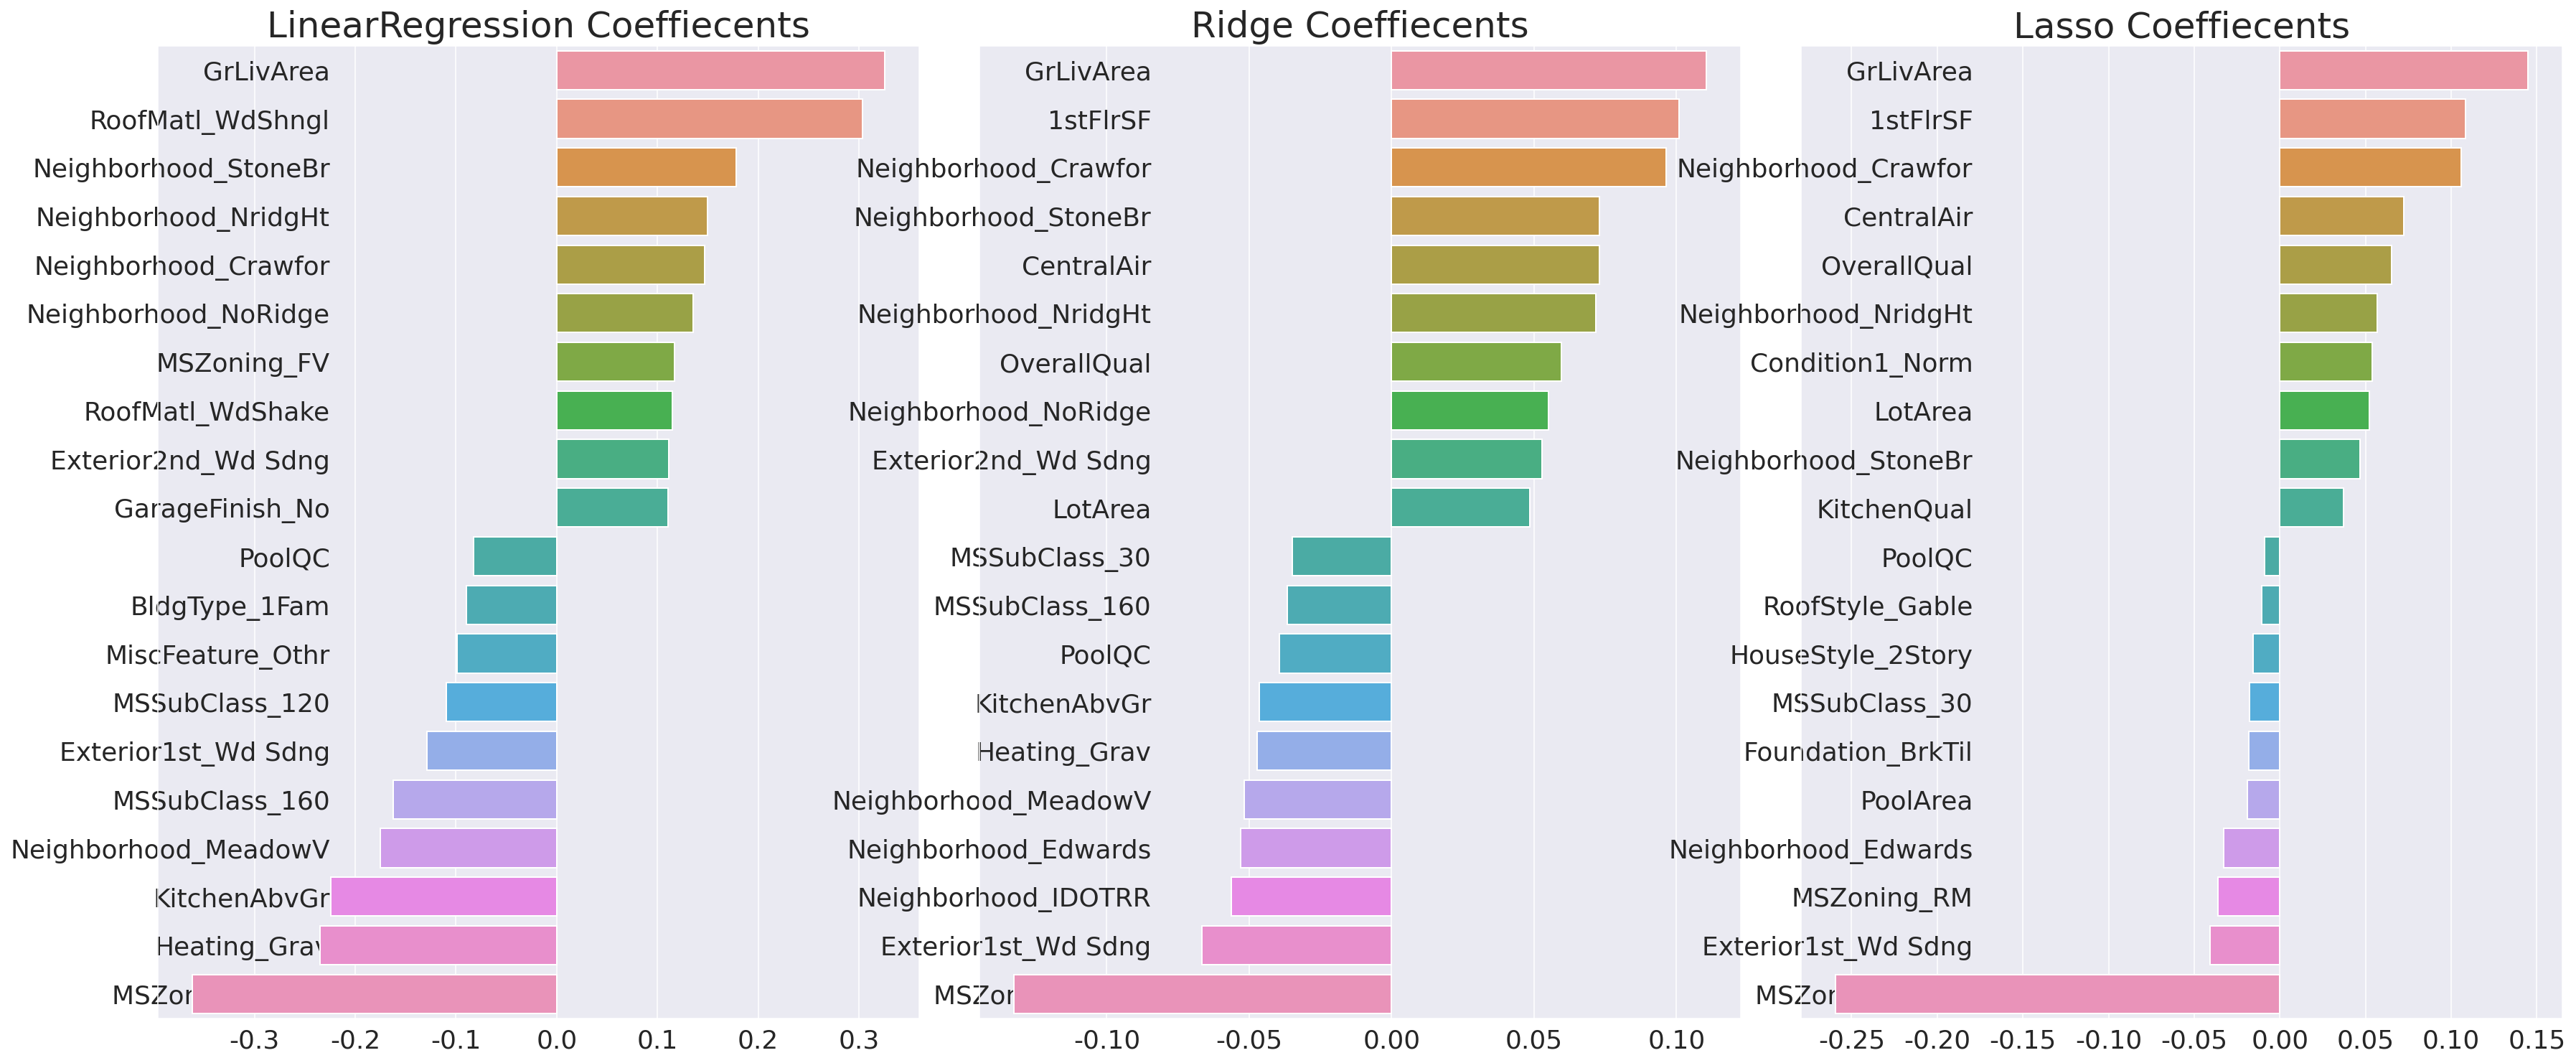

In [62]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [63]:
################################################################################
########################### 변수명 수정 할 것
from scipy.stats import skew 
# 왜도(치우쳐진 정도)

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = X_features.dtypes[X_features.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = X_features[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top1 = skew_features[skew_features > 1]
print(skew_features_top1.sort_values(ascending=False))

Heating_Floor          38.170678
Electrical_Mix         38.170678
MiscFeature_Othr       26.962963
Exterior1st_BrkComm    26.962963
Condition2_RRNn        26.962963
                         ...    
RoofStyle_Hip           1.532484
MSSubClass_60           1.463038
BsmtExposure            1.213820
GarageFinish_Fin        1.210544
GarageType_Detchd       1.064557
Length: 97, dtype: float64


In [64]:
skew_features_top_index1 = skew_features_top1.index

In [65]:
X_features[skew_features_top_index1] = np.log1p(X_features[skew_features_top_index1])

In [66]:
features_index = X_features.dtypes[X_features.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = X_features[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top1 = skew_features[skew_features > 1]
print(skew_features_top1.sort_values(ascending=False))

Electrical_Mix         38.171745
Heating_Floor          38.171745
Exterior1st_BrkComm    26.978446
Condition2_RRNn        26.978446
MiscFeature_Othr       26.978446
                         ...    
Neighborhood_NAmes      1.915405
RoofStyle_Hip           1.530891
MSSubClass_60           1.463987
GarageFinish_Fin        1.210854
GarageType_Detchd       1.065250
Length: 94, dtype: float64


LinearRegression 로그 변환된 RMSE: 0.137
Ridge 로그 변환된 RMSE: 0.126
Lasso 로그 변환된 RMSE: 0.123


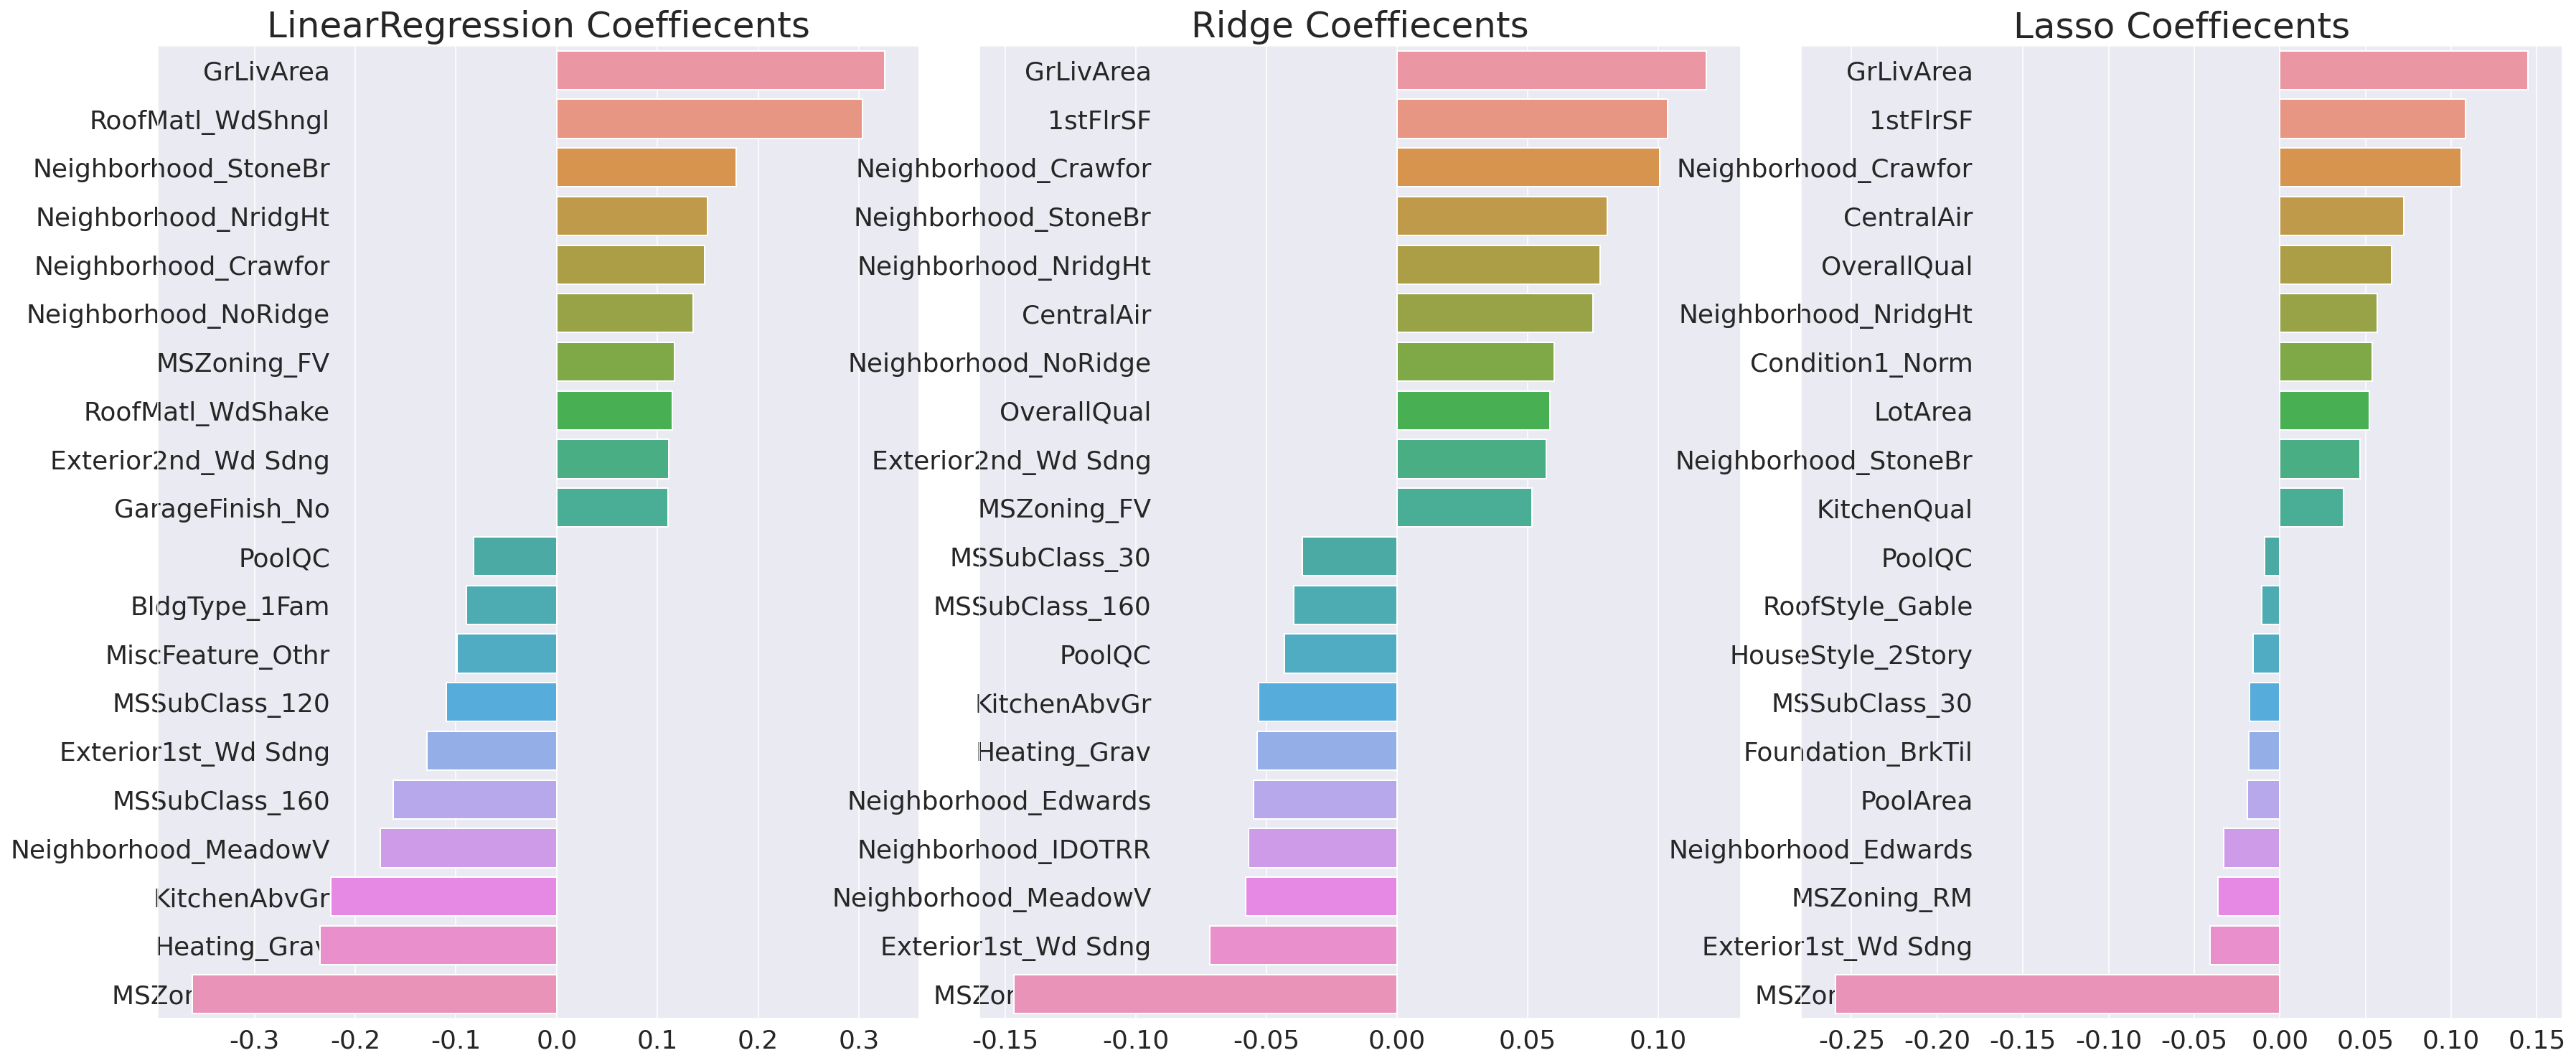

In [67]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

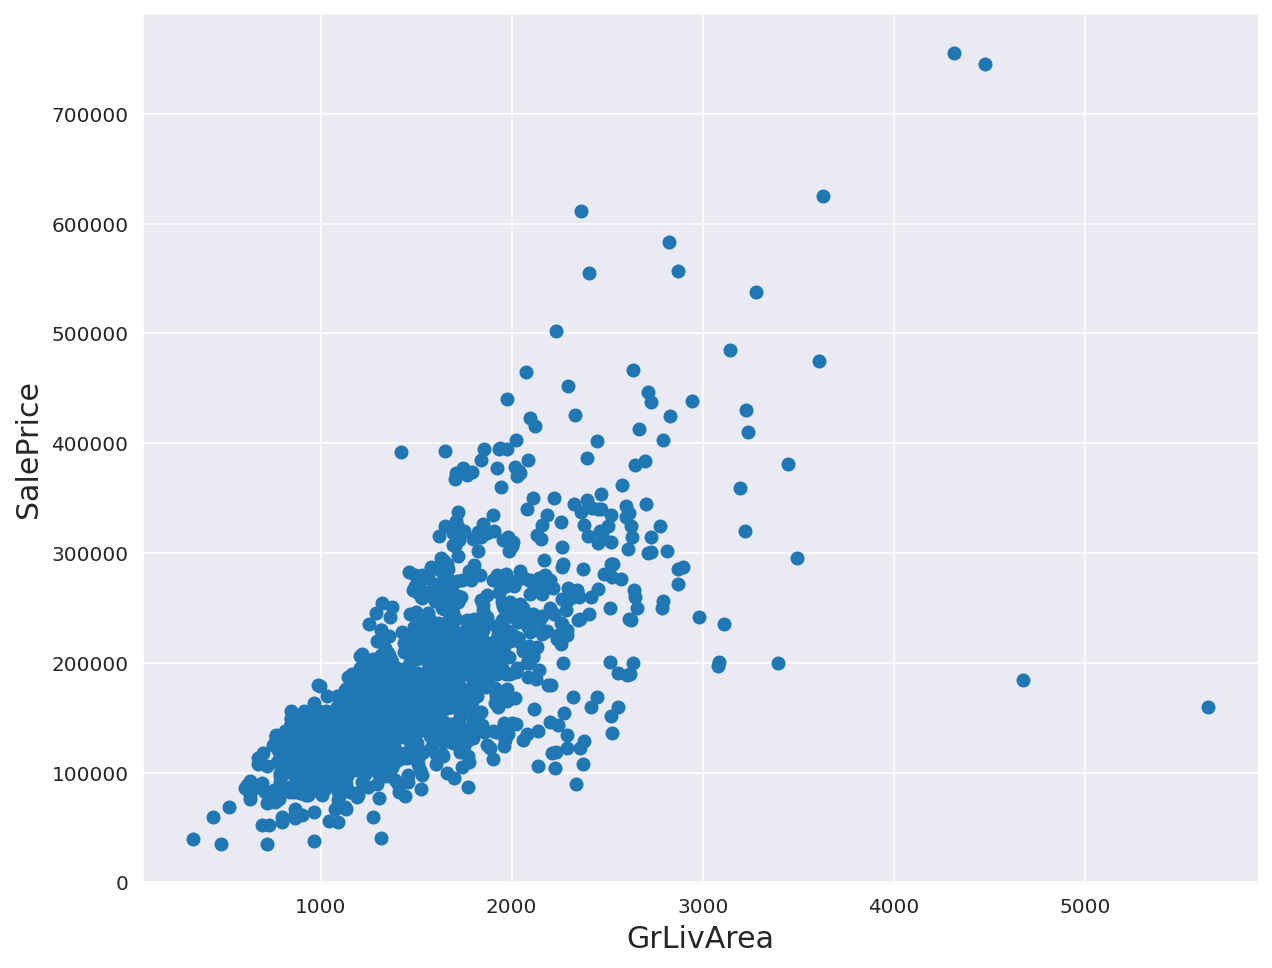

In [68]:
plt.scatter(x = house_train['GrLivArea'], y = house_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [69]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)


[16:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha:{'n_estimators': 1000}


In [70]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1305, 최적 alpha:{'n_estimators': 1000}


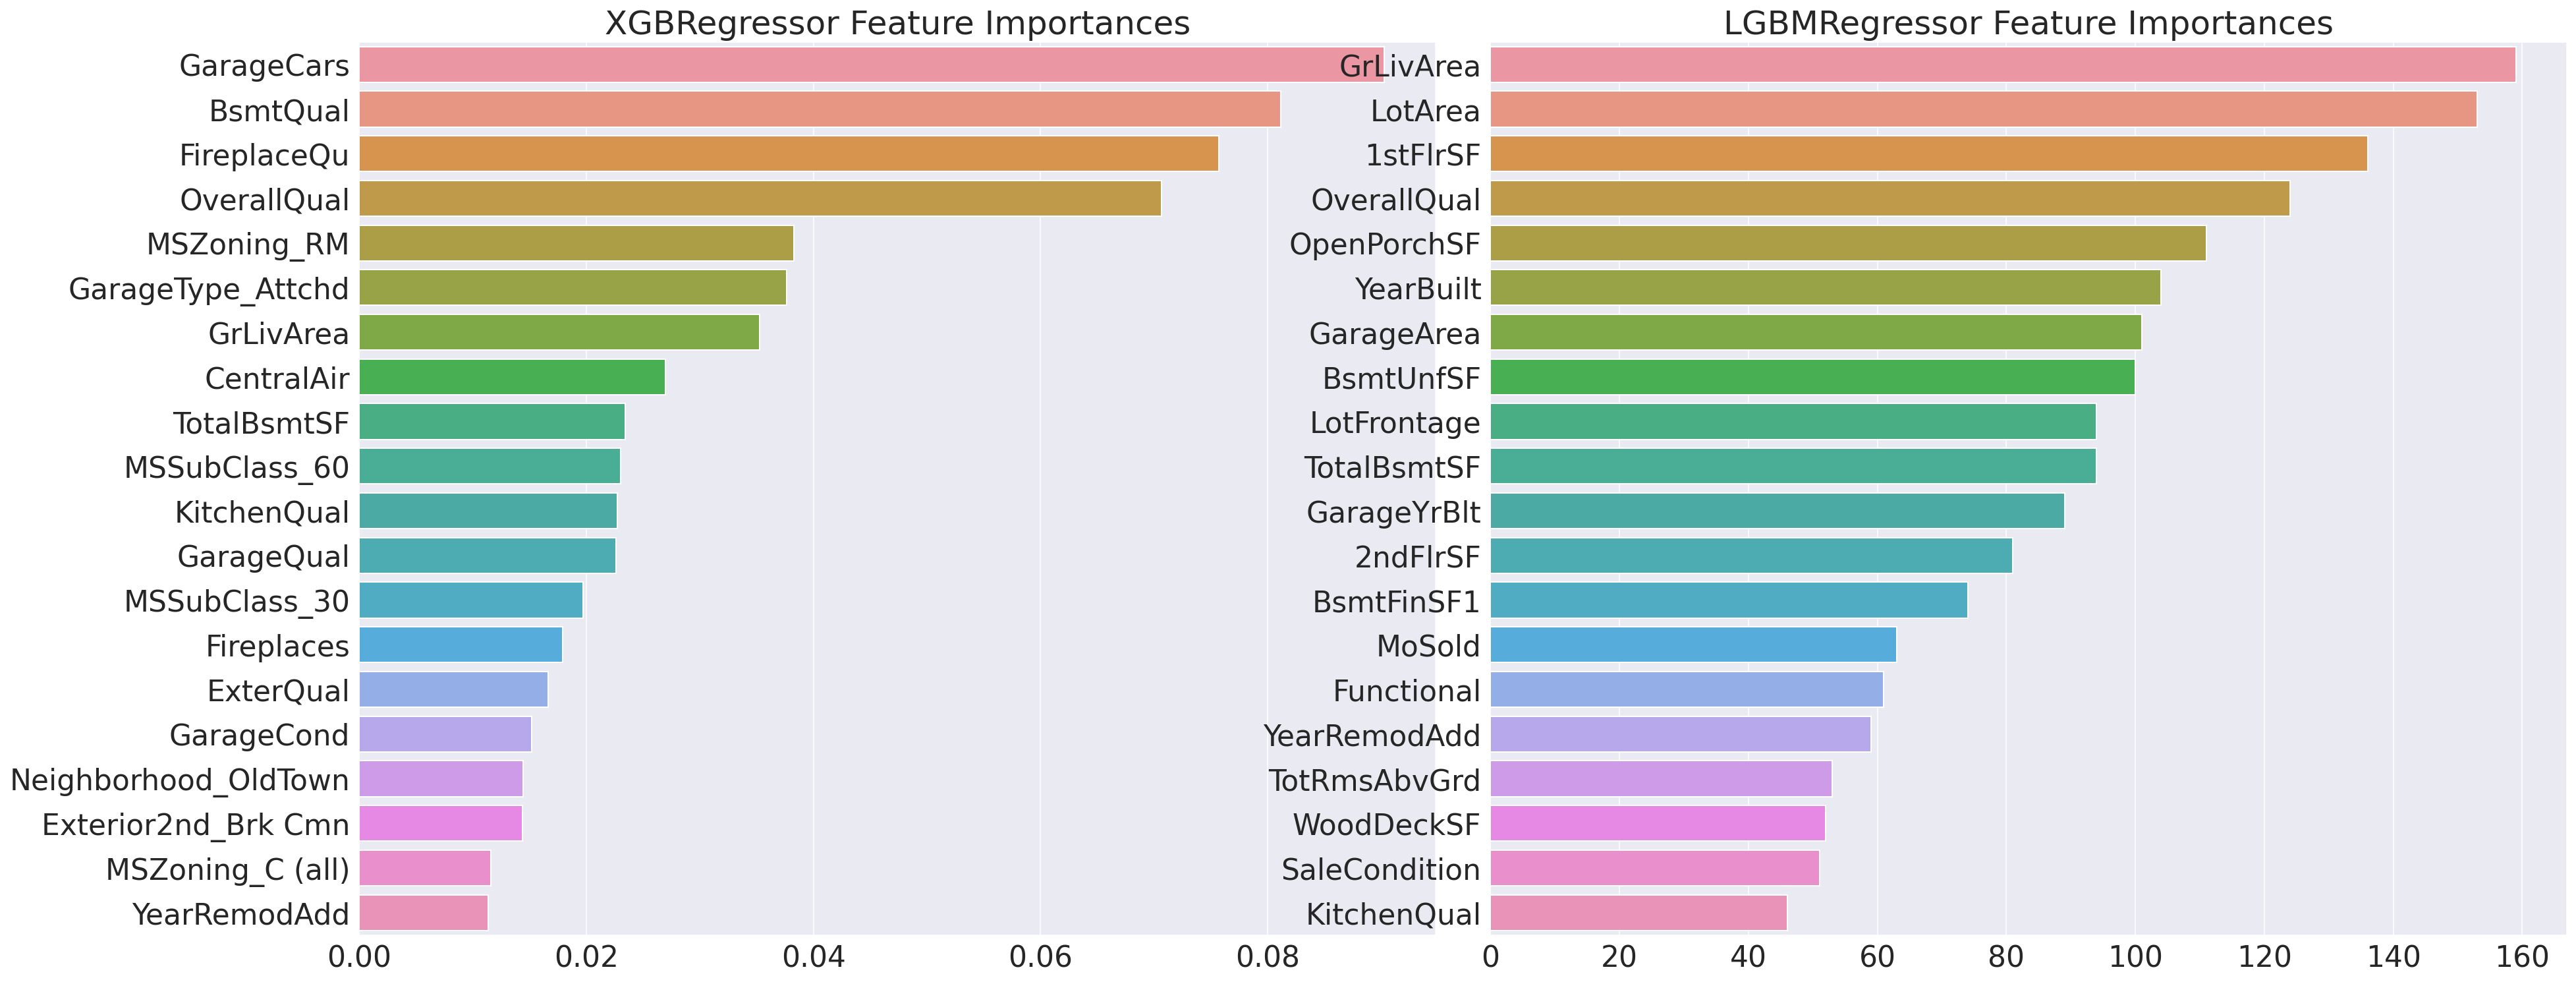

In [71]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [72]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.12381489919031011
Ridge 모델의 RMSE: 0.12676495068904722
Lasso 모델의 RMSE: 0.12330464140705355


In [73]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[16:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 0.12899781173188568
XGBM 모델의 RMSE: 0.13563423762153484
LGBM 모델의 RMSE: 0.12933647896147463


In [74]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [75]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[16:15:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[16:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[16:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[16:15:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[16:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  

In [76]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.12617330107377325


# test데이터 전처리 적용

In [77]:
house_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [78]:
house_test_scatter_color = house_test.copy()

In [79]:
house_test_scatter_color['MSSubClass'] = house_test_scatter_color['MSSubClass'].astype(str)

In [80]:
house_test_scatter_color_numeric = house_test_scatter_color[house_test_scatter_color.dtypes[house_test_scatter_color.dtypes != object].index].drop('Id', axis = 1)

In [81]:
house_test_scatter_color_object = house_test_scatter_color[house_test_scatter_color.dtypes[house_test_scatter_color.dtypes == object].index]

In [82]:
house_test_scatter_color_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [83]:
################################################################################
########################### 변수명 수정 할 것
from scipy.stats import skew 
# 왜도(치우쳐진 정도)

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_test_scatter_color_numeric.dtypes[house_test_scatter_color_numeric.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_test_scatter_color_numeric[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolArea         20.176117
MiscVal          20.054543
LowQualFinSF     16.150628
3SsnPorch        12.511336
EnclosedPorch     4.664371
KitchenAbvGr      4.074860
ScreenPorch       3.784349
LotArea           3.112013
OpenPorchSF       2.685015
WoodDeckSF        2.128569
1stFlrSF          1.556592
GrLivArea         1.129240
dtype: float64


In [84]:
house_test_scatter_color_numeric

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [85]:
house_test_scatter_color_numeric[ske_features_top_index.index[:-1]] = np.log1p(house_test_scatter_color_numeric[ske_features_top_index.index[:-1]])

In [86]:
################################################################################
########################### 변수명 수정 할 것
from scipy.stats import skew 
# 왜도(치우쳐진 정도)

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_test_scatter_color_numeric.dtypes[house_test_scatter_color_numeric.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_test_scatter_color_numeric[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

PoolArea         15.704746
3SsnPorch        10.533015
LowQualFinSF     10.307990
MiscVal           5.257221
KitchenAbvGr      3.146960
ScreenPorch       2.768934
EnclosedPorch     1.826050
dtype: float64


In [87]:
house_test_scatter_color_numeric

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,80.0,9.360741,5,6,1961,1961,0.0,6.150603,4.976734,270.0,...,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010
1,81.0,9.565775,6,6,1958,1958,108.0,6.828712,0.000000,406.0,...,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010
2,74.0,9.534668,5,5,1997,1998,0.0,6.674561,0.000000,137.0,...,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010
3,78.0,9.208238,6,6,1998,1998,20.0,6.401917,0.000000,324.0,...,470.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,6,2010
4,43.0,8.518392,8,5,1992,1992,0.0,5.575949,0.000000,1017.0,...,506.0,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,7.568896,4,7,1970,1970,0.0,0.000000,0.000000,546.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6,2006
1455,21.0,7.546974,4,5,1970,1970,0.0,5.533389,0.000000,294.0,...,286.0,0.000000,3.218876,0.0,0.0,0.000000,0.0,0.000000,4,2006
1456,160.0,9.903538,5,7,1960,1996,0.0,7.110696,0.000000,0.0,...,576.0,6.163315,0.000000,0.0,0.0,0.000000,0.0,0.000000,9,2006
1457,62.0,9.253591,5,5,1992,1992,0.0,5.823046,0.000000,575.0,...,0.0,4.394449,3.496508,0.0,0.0,0.000000,0.0,6.552508,7,2006


In [88]:
house_test_scatter_color_numeric.isna().sum()

LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [89]:
house_test_scatter_color_numeric = house_test_scatter_color_numeric.fillna(house_test_scatter_color_numeric.median())

In [90]:
house_test_scatter_color_numeric.isna().sum()

LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [91]:
house_test_scatter_color_object

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,20,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,20,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,120,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,160,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,85,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [92]:
house_test_scatter_color_object.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [93]:
house_test_scatter_color_object.loc[:, "Alley"] = house_test_scatter_color_object.loc[:, "Alley"].fillna(0)

In [94]:
house_test_scatter_color_object.loc[:, "BsmtQual"] = house_test_scatter_color_object.loc[:, "BsmtQual"].fillna("No")
house_test_scatter_color_object.loc[:, "BsmtCond"] = house_test_scatter_color_object.loc[:, "BsmtCond"].fillna("No")
house_test_scatter_color_object.loc[:, "BsmtExposure"] = house_test_scatter_color_object.loc[:, "BsmtExposure"].fillna("No")
house_test_scatter_color_object.loc[:, "BsmtFinType1"] = house_test_scatter_color_object.loc[:, "BsmtFinType1"].fillna("No")
house_test_scatter_color_object.loc[:, "BsmtFinType2"] = house_test_scatter_color_object.loc[:, "BsmtFinType2"].fillna("No")
house_test_scatter_color_object.loc[:, "FireplaceQu"] = house_test_scatter_color_object.loc[:, "FireplaceQu"].fillna("No")
house_test_scatter_color_object.loc[:, "GarageType"] = house_test_scatter_color_object.loc[:, "GarageType"].fillna("No")
house_test_scatter_color_object.loc[:, "GarageFinish"] = house_test_scatter_color_object.loc[:, "GarageFinish"].fillna("No")
house_test_scatter_color_object.loc[:, "GarageQual"] = house_test_scatter_color_object.loc[:, "GarageQual"].fillna("No")
house_test_scatter_color_object.loc[:, "GarageCond"] = house_test_scatter_color_object.loc[:, "GarageCond"].fillna("No")
house_test_scatter_color_object.loc[:, "PoolQC"] = house_test_scatter_color_object.loc[:, "PoolQC"].fillna("No")
house_test_scatter_color_object.loc[:, "Fence"] = house_test_scatter_color_object.loc[:, "Fence"].fillna("No")
house_test_scatter_color_object.loc[:, "MiscFeature"] = house_test_scatter_color_object.loc[:, "MiscFeature"].fillna("No")
house_test_scatter_color_object.loc[:, "MasVnrType"] = house_test_scatter_color_object.loc[:, "MasVnrType"].fillna("None")

In [95]:
    house_test_scatter_color_object = house_test_scatter_color_object.replace({'Street' :{'Grvl':1,'Pave':2},
                      "Alley" : {"Grvl" : 1, "Pave" : 2},
                      'LandContour' : {'Bnk' : 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       'SaleCondition' : {'AdjLand' : 1, 'Abnorml' : 2, 'Family' : 3, 'Alloca' : 4, 'Normal' : 5, 'Partial' : 6},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       'CentralAir' : {'N' : 0, 'Y' : 1},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [96]:
house_test_scatter_color_object.isnull().sum()

MSSubClass       0
MSZoning         4
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      1
Functional       2
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         1
SaleCondition    0
dtype: int64

In [97]:
house_test_scatter_color_object.isnull().sum()[house_test_scatter_color_object.isnull().sum() > 0 ].index

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual',
       'Functional', 'SaleType'],
      dtype='object')

In [98]:
house_test_scatter_color_object.loc[:, "MSZoning"] = house_test_scatter_color_object.loc[:, "MSZoning"].fillna("No")
house_test_scatter_color_object.loc[:, "Exterior2nd"] = house_test_scatter_color_object.loc[:, "Exterior2nd"].fillna("No")
house_test_scatter_color_object.loc[:, "Functional"] = house_test_scatter_color_object.loc[:, "Functional"].fillna("No")
house_test_scatter_color_object.loc[:, "KitchenQual"] = house_test_scatter_color_object.loc[:, "KitchenQual"].fillna("No")
house_test_scatter_color_object.loc[:, "Exterior1st"] = house_test_scatter_color_object.loc[:, "Exterior1st"].fillna("No")

In [99]:
house_test_scatter_color_object.isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         1
SaleCondition    0
dtype: int64

In [100]:
house_test_scatter_color_object['BsmtQual'] = house_test_scatter_color_object['BsmtQual'].astype(int)
house_test_scatter_color_object['BsmtCond'] = house_test_scatter_color_object['BsmtCond'].astype(int)
house_test_scatter_color_object['BsmtExposure'] = house_test_scatter_color_object['BsmtExposure'].astype(int)
house_test_scatter_color_object['BsmtFinType1'] = house_test_scatter_color_object['BsmtFinType1'].astype(int)
house_test_scatter_color_object['BsmtFinType2'] = house_test_scatter_color_object['BsmtFinType2'].astype(int)
house_test_scatter_color_object['FireplaceQu'] = house_test_scatter_color_object['FireplaceQu'].astype(int)
house_test_scatter_color_object['GarageQual'] = house_test_scatter_color_object['GarageQual'].astype(int)
house_test_scatter_color_object['GarageCond'] = house_test_scatter_color_object['GarageCond'].astype(int)
house_test_scatter_color_object['PoolQC'] = house_test_scatter_color_object['PoolQC'].astype(int)

In [101]:
house_train_scatter_color_object.dtypes[house_train_scatter_color_object.dtypes == float].index

Index([], dtype='object')

In [102]:
house_test_scatter_color_object

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,20,RH,2,0,4,1,4.0,Inside,3,NAmes,...,Attchd,Unf,3,3,2,0,MnPrv,No,WD,5
1,20,RL,2,0,3,1,4.0,Corner,3,NAmes,...,Attchd,Unf,3,3,2,0,No,Gar2,WD,5
2,60,RL,2,0,3,1,4.0,Inside,3,Gilbert,...,Attchd,Fin,3,3,2,0,MnPrv,No,WD,5
3,60,RL,2,0,3,1,4.0,Inside,3,Gilbert,...,Attchd,Fin,3,3,2,0,No,No,WD,5
4,120,RL,2,0,3,3,4.0,Inside,3,StoneBr,...,Attchd,RFn,3,3,2,0,No,No,WD,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,2,0,4,1,4.0,Inside,3,MeadowV,...,No,No,0,0,2,0,No,No,WD,5
1455,160,RM,2,0,4,1,4.0,Inside,3,MeadowV,...,CarPort,Unf,3,3,2,0,No,No,WD,2
1456,20,RL,2,0,4,1,4.0,Inside,3,Mitchel,...,Detchd,Unf,3,3,2,0,No,No,WD,2
1457,85,RL,2,0,4,1,4.0,Inside,3,Mitchel,...,No,No,0,0,2,0,MnPrv,Shed,WD,5


In [103]:
imsi20 = house_test_scatter_color_object.join(house_test_scatter_color_numeric)

In [104]:
imsi20

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,RH,2,0,4,1,4.0,Inside,3,NAmes,...,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010
1,20,RL,2,0,3,1,4.0,Corner,3,NAmes,...,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010
2,60,RL,2,0,3,1,4.0,Inside,3,Gilbert,...,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010
3,60,RL,2,0,3,1,4.0,Inside,3,Gilbert,...,470.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,6,2010
4,120,RL,2,0,3,3,4.0,Inside,3,StoneBr,...,506.0,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,2,0,4,1,4.0,Inside,3,MeadowV,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,6,2006
1455,160,RM,2,0,4,1,4.0,Inside,3,MeadowV,...,286.0,0.000000,3.218876,0.0,0.0,0.000000,0.0,0.000000,4,2006
1456,20,RL,2,0,4,1,4.0,Inside,3,Mitchel,...,576.0,6.163315,0.000000,0.0,0.0,0.000000,0.0,0.000000,9,2006
1457,85,RL,2,0,4,1,4.0,Inside,3,Mitchel,...,0.0,4.394449,3.496508,0.0,0.0,0.000000,0.0,6.552508,7,2006


In [105]:
house_new_test = pd.get_dummies(imsi20)

In [106]:
house_new_test

,Street,Alley,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,...,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,2,0,4,1,4.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
1,2,0,3,1,4.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
2,2,0,3,1,4.0,3,3,3,4,3,...,0,0,0,0,0,0,0,0,0,1
3,2,0,3,1,4.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
4,2,0,3,3,4.0,3,4,3,4,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,0,4,1,4.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
1455,2,0,4,1,4.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
1456,2,0,4,1,4.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
1457,2,0,4,1,4.0,3,3,3,4,3,...,1,0,0,0,0,0,0,0,0,1


In [107]:
house_new_train_columns = list(house_new_train.columns)

In [108]:
house_new_train.columns

Index(['Condition1_PosA', 'RoofMatl_WdShake', 'Exterior2nd_Wd Shng',
       'LowQualFinSF', 'Heating_Floor', 'Condition2_RRNn', 'MSSubClass_20',
       'Condition2_Feedr', 'Exterior2nd_Brk Cmn', 'MoSold',
       ...
       'FullBath', '1stFlrSF', 'BsmtQual', 'TotalBsmtSF', 'GarageArea',
       'KitchenQual', 'ExterQual', 'GarageCars', 'GrLivArea', 'OverallQual'],
      dtype='object', length=158)

In [109]:
a = []
for i in list(house_new_test.columns):
    if i not in house_new_train.columns:
        a.append(i)
a

['Utilities',
 'LandSlope',
 'ExterCond',
 'BsmtFinType2',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'YrSold',
 'MSSubClass_150',
 'MSSubClass_40',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSZoning_No',
 'LotConfig_Corner',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_SawyerW',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Tar&Grv',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_No',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_HdBoard',
 'Exterior2nd_Im

In [114]:
# house_new_test_droped = house_new_test.drop(['LandSlope',
#  'ExterCond',
#  'BsmtFinType2',
#  'OverallCond',
#  'BsmtFinSF2',
#  'BsmtHalfBath',
#  'YrSold',
#  'MSSubClass_150',
#  'MSSubClass_40',
#  'MSSubClass_70',
#  'MSSubClass_75',
#  'MSSubClass_80',
#  'MSSubClass_85',
#  'MSZoning_No',
#  'Utilities_4.0',
#  'Utilities_No',
#  'LotConfig_Corner',
#  'LotConfig_FR2',
#  'LotConfig_FR3',
#  'Neighborhood_Blmngtn',
#  'Neighborhood_Blueste',
#  'Neighborhood_Mitchel',
#  'Neighborhood_NPkVill',
#  'Neighborhood_SawyerW',
#  'Condition1_RRAe',
#  'Condition1_RRAn',
#  'Condition1_RRNe',
#  'Condition1_RRNn',
#  'Condition2_Artery',
#  'Condition2_Norm',
#  'Condition2_PosA',
#  'Condition2_PosN',
#  'BldgType_TwnhsE',
#  'HouseStyle_2.5Unf',
#  'HouseStyle_SLvl',
#  'RoofStyle_Flat',
#  'RoofStyle_Gambrel',
#  'RoofStyle_Mansard',
#  'RoofStyle_Shed',
#  'RoofMatl_Tar&Grv',
#  'Exterior1st_AsphShn',
#  'Exterior1st_BrkFace',
#  'Exterior1st_CBlock',
#  'Exterior1st_No',
#  'Exterior1st_Plywood',
#  'Exterior1st_Stucco',
#  'Exterior2nd_AsphShn',
#  'Exterior2nd_BrkFace',
#  'Exterior2nd_CBlock',
#  'Exterior2nd_HdBoard',
#  'Exterior2nd_ImStucc',
#  'Exterior2nd_No',
#  'Exterior2nd_Plywood',
#  'Exterior2nd_Stone',
#  'MasVnrType_BrkCmn',
#  'Foundation_Stone',
#  'Foundation_Wood',
#  'Heating_GasW',
#  'KitchenQual_2.0',
#  'KitchenQual_3.0',
#  'KitchenQual_4.0',
#  'KitchenQual_5.0',
#  'KitchenQual_No',
#  'Functional_2.0',
#  'Functional_3.0',
#  'Functional_4.0',
#  'Functional_5.0',
#  'Functional_6.0',
#  'Functional_7.0',
#  'Functional_8.0',
#  'Functional_No',
#  'GarageType_2Types',
#  'GarageType_Basment',
#  'Fence_GdPrv',
#  'Fence_MnWw',
#  'MiscFeature_Gar2',
#  'SaleType_CWD',
#  'SaleType_Con',
#  'SaleType_ConLD',
#  'SaleType_ConLI',
#  'SaleType_ConLw',
#  'SaleType_No',
#  'SaleType_Oth'], axis = 1)

KeyError: ignored

In [115]:
house_new_test_droped = house_new_test.drop(['Utilities',
 'LandSlope',
 'ExterCond',
 'BsmtFinType2',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'YrSold',
 'MSSubClass_150',
 'MSSubClass_40',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSZoning_No',
 'LotConfig_Corner',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_SawyerW',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Tar&Grv',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_No',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_No',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'MasVnrType_BrkCmn',
 'Foundation_Stone',
 'Foundation_Wood',
 'Heating_GasW',
 'KitchenQual_2.0',
 'KitchenQual_3.0',
 'KitchenQual_4.0',
 'KitchenQual_5.0',
 'KitchenQual_No',
 'Functional_2.0',
 'Functional_3.0',
 'Functional_4.0',
 'Functional_5.0',
 'Functional_6.0',
 'Functional_7.0',
 'Functional_8.0',
 'Functional_No',
 'GarageType_2Types',
 'GarageType_Basment',
 'Fence_GdPrv',
 'Fence_MnWw',
 'MiscFeature_Gar2',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_Oth'], axis = 1)

In [116]:
house_new_test_droped.columns

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'ExterQual', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       ...
       'GarageFinish_Unf', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_No',
       'MiscFeature_No', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'SaleType_COD', 'SaleType_New', 'SaleType_WD'],
      dtype='object', length=153)

In [117]:
imsi18

,Condition1_PosA,RoofMatl_WdShake,Exterior2nd_Wd Shng,LowQualFinSF,Heating_Floor,Condition2_RRNn,MSSubClass_20,Condition2_Feedr,Exterior2nd_Brk Cmn,MoSold,...,FullBath,1stFlrSF,BsmtQual,TotalBsmtSF,GarageArea,KitchenQual,ExterQual,GarageCars,GrLivArea,OverallQual
0,0,0,0,0.0,0,0,0,0,0,2,...,2,6.753438,4,856,548,4,4,2,7.444833,7
1,0,0,0,0.0,0,0,1,0,0,5,...,2,7.141245,4,1262,460,3,3,2,7.141245,6
2,0,0,0,0.0,0,0,0,0,0,9,...,2,6.825460,4,920,608,4,4,2,7.488294,7
3,0,0,1,0.0,0,0,0,0,0,2,...,1,6.869014,3,756,642,4,3,3,7.448916,7
4,0,0,0,0.0,0,0,0,0,0,12,...,2,7.044033,4,1145,836,4,4,3,7.695758,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0.0,0,0,0,0,0,8,...,2,6.860664,4,953,460,3,3,2,7.407318,6
1456,0,0,0,0.0,0,0,1,0,0,2,...,2,7.637234,4,1542,500,3,3,2,7.637234,6
1457,0,0,0,0.0,0,0,0,0,0,5,...,2,7.080868,3,1152,252,4,5,1,7.758333,7
1458,0,0,0,0.0,0,0,1,0,0,4,...,1,6.983790,3,1078,240,4,3,1,6.983790,5


In [118]:
a = []
for i in list(house_new_test_droped.columns):
    if i not in house_new_train.columns:
        a.append(i)
a

[]

In [119]:
a = []
for i in list(house_new_train.columns):
    if i not in house_new_test_droped.columns:
        a.append(i)
a

['Heating_Floor',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Functional',
 'KitchenQual']

In [120]:
#house_new_train_droped = house_new_train.drop(['Functional', 'KitchenQual'], axis = 1)

In [121]:
house_new_train_droped = house_new_train.drop(['Heating_Floor',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Functional',
 'KitchenQual'], axis = 1)

In [122]:
house_new_test_droped

,Street,Alley,LotShape,LandContour,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,...,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_No,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_WD
0,2,0,4,1,3,3,3,0,3,3,...,1,0,1,0,1,0,0,0,0,1
1,2,0,3,1,3,3,3,0,5,3,...,1,0,0,1,0,0,0,0,0,1
2,2,0,3,1,3,4,3,0,6,4,...,0,0,1,0,1,0,0,0,0,1
3,2,0,3,1,3,3,3,0,6,5,...,0,0,0,1,1,0,0,0,0,1
4,2,0,3,3,4,4,3,0,5,5,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,0,4,1,3,3,3,0,1,4,...,0,0,0,1,1,0,0,0,0,1
1455,2,0,4,1,3,3,3,0,3,3,...,1,0,0,1,1,0,0,0,0,1
1456,2,0,4,1,3,3,3,0,5,5,...,1,0,0,1,1,0,0,0,0,1
1457,2,0,4,1,3,4,3,2,6,3,...,0,0,1,0,0,0,1,0,0,1


In [123]:
house_new_train_droped

,Condition1_PosA,RoofMatl_WdShake,Exterior2nd_Wd Shng,LowQualFinSF,MSSubClass_20,Condition2_Feedr,Exterior2nd_Brk Cmn,MoSold,Street,Exterior2nd_Stucco,...,YearBuilt,FullBath,1stFlrSF,BsmtQual,TotalBsmtSF,GarageArea,ExterQual,GarageCars,GrLivArea,OverallQual
0,0.0,0.0,0.000000,0.0,0,0.0,0.0,2,2,0.0,...,2003,2,6.753438,4,856,548,4,2,7.444833,7
1,0.0,0.0,0.000000,0.0,1,0.0,0.0,5,2,0.0,...,1976,2,7.141245,4,1262,460,3,2,7.141245,6
2,0.0,0.0,0.000000,0.0,0,0.0,0.0,9,2,0.0,...,2001,2,6.825460,4,920,608,4,2,7.488294,7
3,0.0,0.0,0.693359,0.0,0,0.0,0.0,2,2,0.0,...,1915,1,6.869014,3,756,642,3,3,7.448916,7
4,0.0,0.0,0.000000,0.0,0,0.0,0.0,12,2,0.0,...,2000,2,7.044033,4,1145,836,4,3,7.695758,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.000000,0.0,0,0.0,0.0,8,2,0.0,...,1999,2,6.860664,4,953,460,3,2,7.407318,6
1456,0.0,0.0,0.000000,0.0,1,0.0,0.0,2,2,0.0,...,1978,2,7.637234,4,1542,500,3,2,7.637234,6
1457,0.0,0.0,0.000000,0.0,0,0.0,0.0,5,2,0.0,...,1941,2,7.080868,3,1152,252,5,1,7.758333,7
1458,0.0,0.0,0.000000,0.0,1,0.0,0.0,4,2,0.0,...,1950,1,6.983790,3,1078,240,3,1,6.983790,5


In [124]:
house_new_target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [125]:
house_new_train.isna().sum()[house_new_train.isna().sum() > 0]

Series([], dtype: int64)

In [126]:
house_new_test_droped.isna().sum()[house_new_test_droped.isna().sum() > 0]

Series([], dtype: int64)

# 컬럼수 조금 차이남

In [127]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = house_new_train_droped.values
X_test_n = house_new_test_droped.values
y_train_n = house_new_target.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[16:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[16:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[16:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[16:17:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[16:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  

In [128]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train_n)
final = meta_model_lasso.predict(Stack_final_X_test)
#mse = mean_squared_error(y_test , final)
#rmse = np.sqrt(mse)
#print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

In [129]:
final

array([44.1054809 , 44.67958741, 43.38347987, ..., 47.53931572,
       41.47557591, 42.09573183])

In [130]:
np.expm1(final)

array([1.42812748e+19, 2.53570230e+19, 6.93754662e+18, ...,
       4.42652062e+20, 1.02947013e+18, 1.91400931e+18])